In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve)
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [18]:
df = pd.read_csv('diabetes.csv')

In [19]:
df.shape

(768, 9)

In [20]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [23]:
print(df['Outcome'].value_counts())
print("\nClass Balance:")
print(df['Outcome'].value_counts(normalize=True) * 100)


Outcome
0    500
1    268
Name: count, dtype: int64

Class Balance:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [24]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [25]:
# DATA QUALITY ANALYSIS
# Check for zero values (which are actually missing in this dataset)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\n🔍 Zero Values Detection (these represent missing data):")
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    zero_percent = (zero_count / len(df)) * 100
    print(f"{col}: {zero_count} ({zero_percent:.2f}%)")


🔍 Zero Values Detection (these represent missing data):
Glucose: 5 (0.65%)
BloodPressure: 35 (4.56%)
SkinThickness: 227 (29.56%)
Insulin: 374 (48.70%)
BMI: 11 (1.43%)



Correlation with Target Variable:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


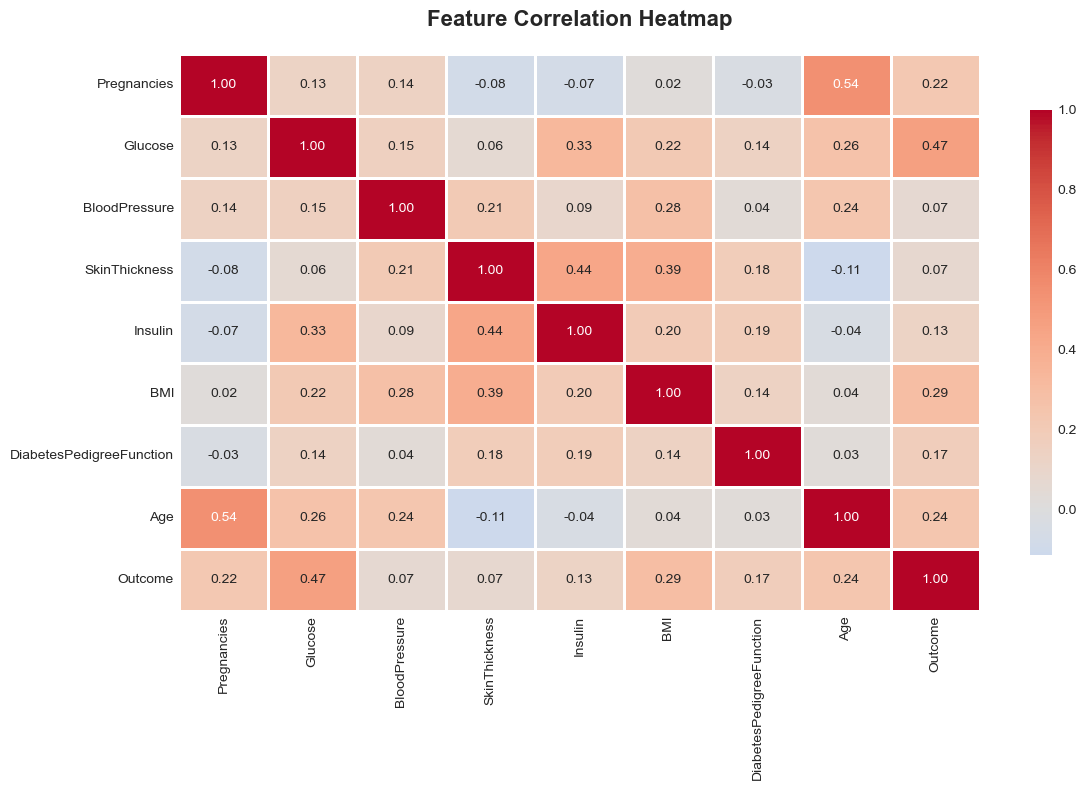


Bayes' Theorem: P(Diabetes | Glucose > 140) = 0.687

t-Tests (Diabetic vs Non-Diabetic):
Glucose: t-stat=-14.600, p-value=0.0000
BMI: t-stat=-8.472, p-value=0.0000
Age: t-stat=-6.793, p-value=0.0000
BloodPressure: t-stat=-1.805, p-value=0.0715


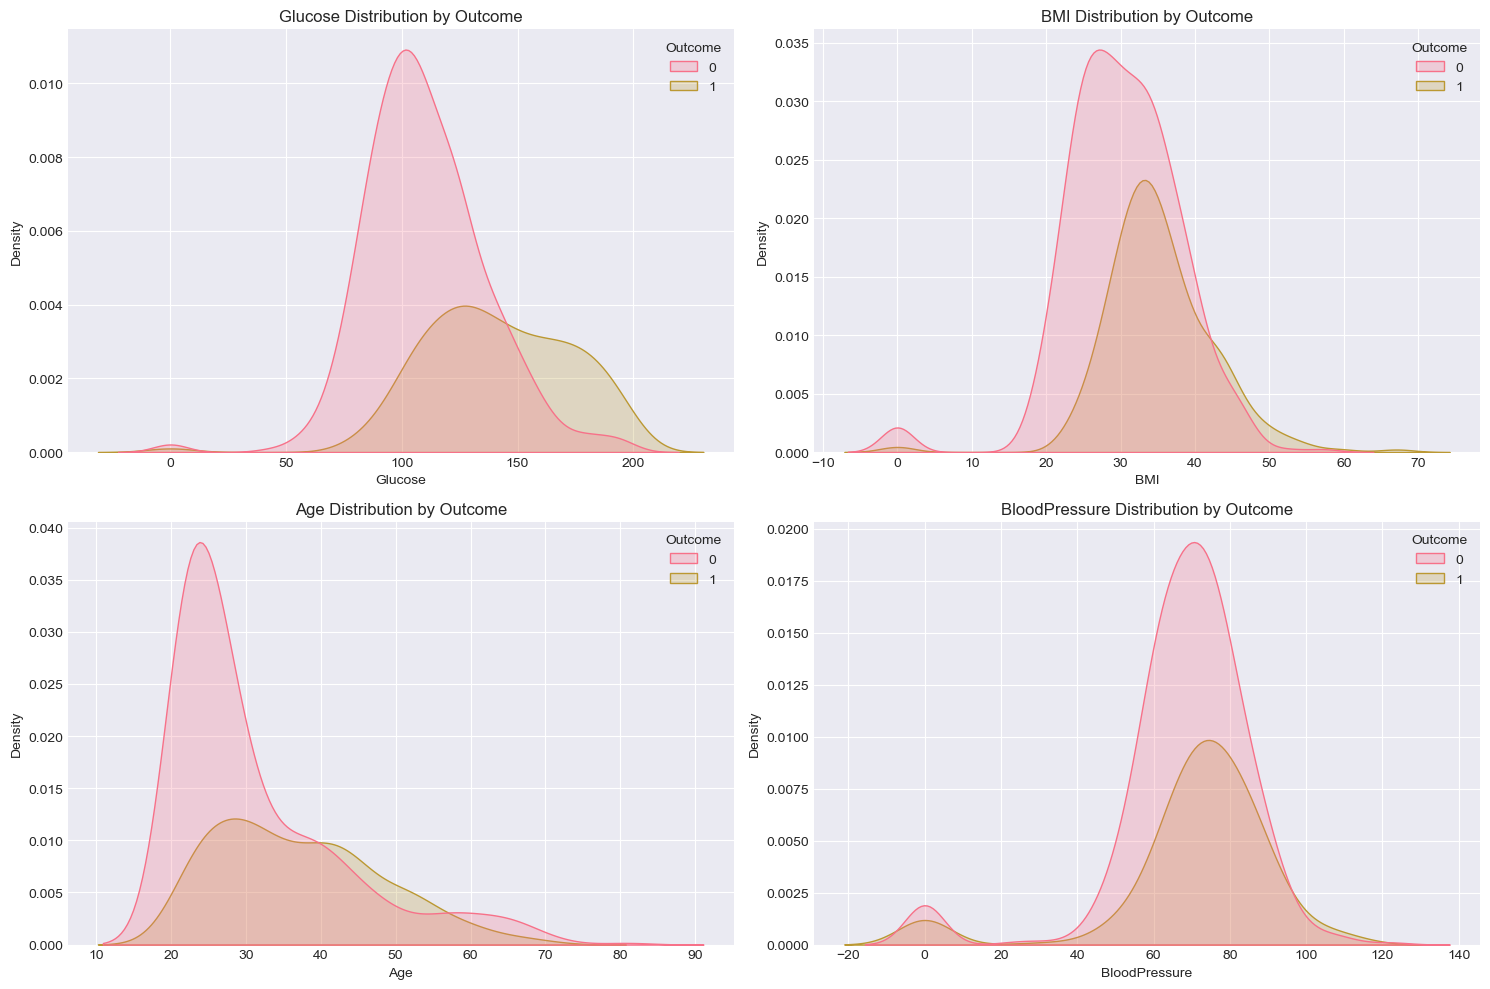


📊 Outlier Detection:


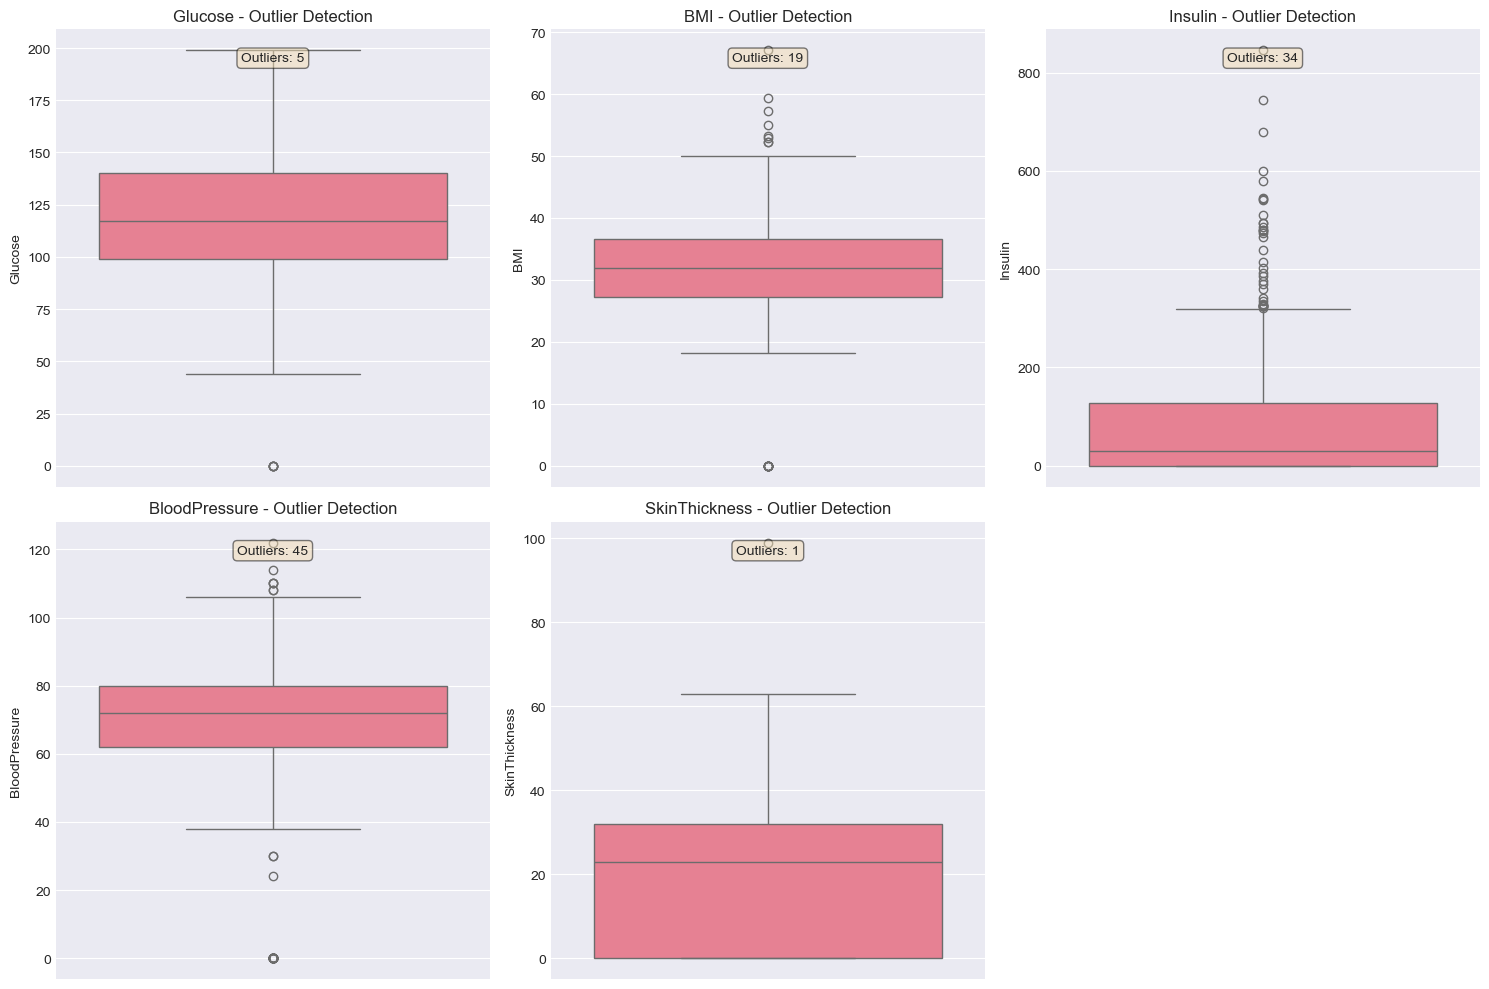

In [27]:
# ========== MODULE 1 - STATISTICAL FOUNDATION ==========
from scipy.stats import ttest_ind

# Correlation Analysis
print("\nCorrelation with Target Variable:")
correlations = df.corr()['Outcome'].sort_values(ascending=False)
print(correlations)

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Bayes' Theorem: P(Diabetes | Glucose > 140)
glucose_threshold = 140
p_diabetes = df['Outcome'].mean()
p_glucose_high = (df['Glucose'] > glucose_threshold).mean()
p_glucose_high_given_diabetes = df[df['Outcome']==1]['Glucose'].gt(glucose_threshold).mean()
p_diabetes_given_glucose_high = (p_glucose_high_given_diabetes * p_diabetes) / p_glucose_high if p_glucose_high > 0 else 0
print(f"\nBayes' Theorem: P(Diabetes | Glucose > {glucose_threshold}) = {p_diabetes_given_glucose_high:.3f}")

# t-Tests comparing diabetic vs non-diabetic groups
print("\nt-Tests (Diabetic vs Non-Diabetic):")
test_features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
for feature in test_features:
    group0 = df[df['Outcome']==0][feature]
    group1 = df[df['Outcome']==1][feature]
    t_stat, p_val = ttest_ind(group0, group1)
    print(f"{feature}: t-stat={t_stat:.3f}, p-value={p_val:.4f}")

# Probability Distributions (KDE plots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(test_features):
    ax = axes[i//2, i%2]
    sns.kdeplot(data=df, x=feature, hue='Outcome', fill=True, ax=ax)
    ax.set_title(f'{feature} Distribution by Outcome')
plt.tight_layout()
plt.show()

# Outlier Detection (Box Plots)
print("\n📊 Outlier Detection:")
outlier_check_features = ['Glucose', 'BMI', 'Insulin', 'BloodPressure', 'SkinThickness']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(outlier_check_features):
    ax = axes[i//3, i%3]
    sns.boxplot(data=df, y=feature, ax=ax)
    ax.set_title(f'{feature} - Outlier Detection')
    # Calculate outliers using IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)][feature]
    ax.text(0.5, 0.95, f'Outliers: {len(outliers)}', transform=ax.transAxes, 
            ha='center', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# Remove empty subplot
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

In [28]:
# ========== MODULE 2 - DATA HANDLING ==========
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

df_processed = df.copy()

# KNN Imputation for missing values (zeros represent missing)
print("\n🔧 KNN Imputation for Missing Values:")
for col in zero_cols:
    df_processed[col] = df_processed[col].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
df_processed[zero_cols] = imputer.fit_transform(df_processed[zero_cols])
print("✓ Imputed Insulin and SkinThickness using KNN")

# Outlier Detection and Removal (z-score)
print("\n🔍 Outlier Detection (z-score > 3):")
outlier_features = ['Glucose', 'BMI', 'Insulin']
z_scores = np.abs(df_processed[outlier_features].apply(zscore))
outliers_mask = (z_scores > 3).any(axis=1)
print(f"Outliers detected: {outliers_mask.sum()}")
df_processed = df_processed[~outliers_mask]
print(f"✓ Removed {outliers_mask.sum()} outlier rows")

# Feature Normalization (StandardScaler)
print("\n🔬 Feature Engineering:")
df_processed['BMI_category'] = pd.cut(df_processed['BMI'], bins=[0, 18.5, 25, 30, 100], 
                                       labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df_processed['BMI_category'] = df_processed['BMI_category'].cat.codes
df_processed['glucose_insulin_ratio'] = df_processed['Glucose'] / (df_processed['Insulin'] + 1)
df_processed['age_group'] = pd.cut(df_processed['Age'], bins=[0, 30, 50, 100], 
                                    labels=['<30', '30-50', '>50'])
df_processed['age_group'] = df_processed['age_group'].cat.codes
print("✓ Created BMI_category, glucose_insulin_ratio, age_group")

# Prepare features and target
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Features scaled using StandardScaler")

# Balance classes using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print(f"\n✓ SMOTE applied: {len(y_train)} → {len(y_train_balanced)} samples")
print(f"  Class distribution: {pd.Series(y_train_balanced).value_counts().to_dict()}")


🔧 KNN Imputation for Missing Values:
✓ Imputed Insulin and SkinThickness using KNN

🔍 Outlier Detection (z-score > 3):
Outliers detected: 22
✓ Removed 22 outlier rows

🔬 Feature Engineering:
✓ Created BMI_category, glucose_insulin_ratio, age_group
✓ Features scaled using StandardScaler

✓ SMOTE applied: 596 → 790 samples
  Class distribution: {1: 395, 0: 395}



 Training and tuning models with 5-fold CV...

✓ Logistic Regression
  Best params: {'C': 10, 'penalty': 'l2'}
  Accuracy: 0.7200 | Precision: 0.5714 | Recall: 0.7059 | F1: 0.6316 | ROC-AUC: 0.8273

✓ Logistic Regression
  Best params: {'C': 10, 'penalty': 'l2'}
  Accuracy: 0.7200 | Precision: 0.5714 | Recall: 0.7059 | F1: 0.6316 | ROC-AUC: 0.8273

✓ Decision Tree
  Best params: {'max_depth': 5, 'min_samples_split': 5}
  Accuracy: 0.7133 | Precision: 0.5645 | Recall: 0.6863 | F1: 0.6195 | ROC-AUC: 0.7549

✓ Decision Tree
  Best params: {'max_depth': 5, 'min_samples_split': 5}
  Accuracy: 0.7133 | Precision: 0.5645 | Recall: 0.6863 | F1: 0.6195 | ROC-AUC: 0.7549

✓ Random Forest
  Best params: {'max_depth': 10, 'n_estimators': 200}
  Accuracy: 0.7400 | Precision: 0.6034 | Recall: 0.6863 | F1: 0.6422 | ROC-AUC: 0.8227

✓ Random Forest
  Best params: {'max_depth': 10, 'n_estimators': 200}
  Accuracy: 0.7400 | Precision: 0.6034 | Recall: 0.6863 | F1: 0.6422 | ROC-AUC: 0.8227

✓ Gradient B

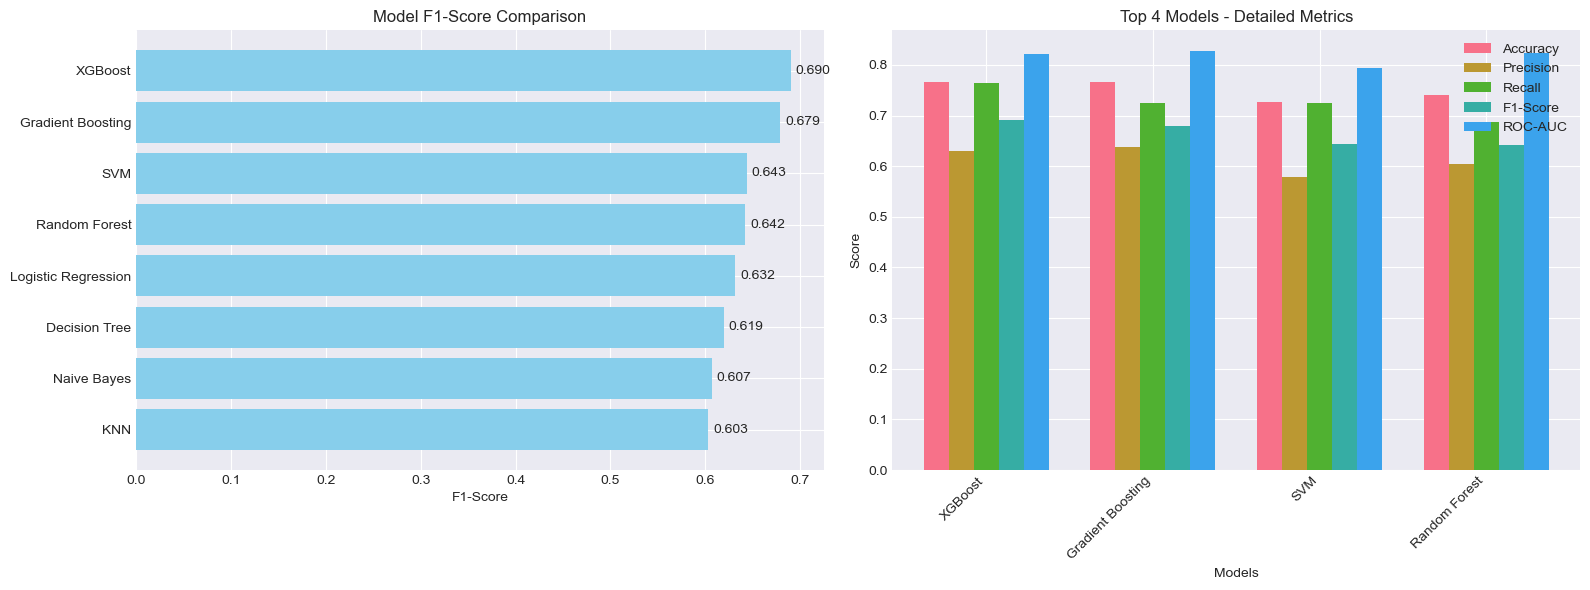

In [33]:
# ========== MODULE 3 - SUPERVISED LEARNING ==========
# Define models for comparison
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Parameter grids for GridSearchCV with 5-fold stratified CV
param_grids = {
    'Logistic Regression': { 'C': [0.1, 1, 10], 'penalty': ['l2'] },
    'Decision Tree': { 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5] },
    'Random Forest': { 'n_estimators': [100, 200], 'max_depth': [5, 10, None] },
    'Gradient Boosting': { 'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5] },
    'SVM': { 'C': [0.5, 1, 5], 'gamma': ['scale', 'auto'] },
    'KNN': { 'n_neighbors': [3, 5, 7, 9] },
    'Naive Bayes': { },
    'XGBoost': { 'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.05, 0.1] }
}

results = []
best_estimators = {}

print("\n Training and tuning models with 5-fold CV...\n")

for name, model in models.items():
    grid_params = param_grids.get(name, {})
    if grid_params:
        grid = GridSearchCV(model, grid_params, cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train_balanced, y_train_balanced)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        best_model = model.fit(X_train_balanced, y_train_balanced)
        best_params = {}
    
    best_estimators[name] = best_model
    
    # Predictions on test set
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    
    print(f"✓ {name}")
    if best_params:
        print(f"  Best params: {best_params}")
    roc_auc_str = f"{roc_auc:.4f}" if not np.isnan(roc_auc) else "N/A"
    print(f"  Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc_str}")
    print()

# Results dataframe
results_df = pd.DataFrame(results).sort_values(['F1-Score','ROC-AUC'], ascending=False).reset_index(drop=True)
print("\n MODEL COMPARISON:")
print(results_df.to_string(index=False))

# Select final model
best_model_name = results_df.iloc[0]['Model']
final_model = best_estimators[best_model_name]
print(f"\n✓ Selected final model: {best_model_name}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All models comparison
ax = axes[0]
results_df_sorted = results_df.sort_values('F1-Score')
ax.barh(results_df_sorted['Model'], results_df_sorted['F1-Score'], color='skyblue')
ax.set_xlabel('F1-Score')
ax.set_title('Model F1-Score Comparison')
for i, v in enumerate(results_df_sorted['F1-Score']):
    ax.text(v + 0.005, i, f'{v:.3f}', va='center')

# Plot 2: Top 4 models detailed metrics
ax = axes[1]
top_models = results_df.head(4)
x = np.arange(len(top_models))
width = 0.15
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for i, metric in enumerate(metrics):
    values = top_models[metric].fillna(0)
    ax.bar(x + i*width, values, width, label=metric)
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Top 4 Models - Detailed Metrics')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(top_models['Model'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

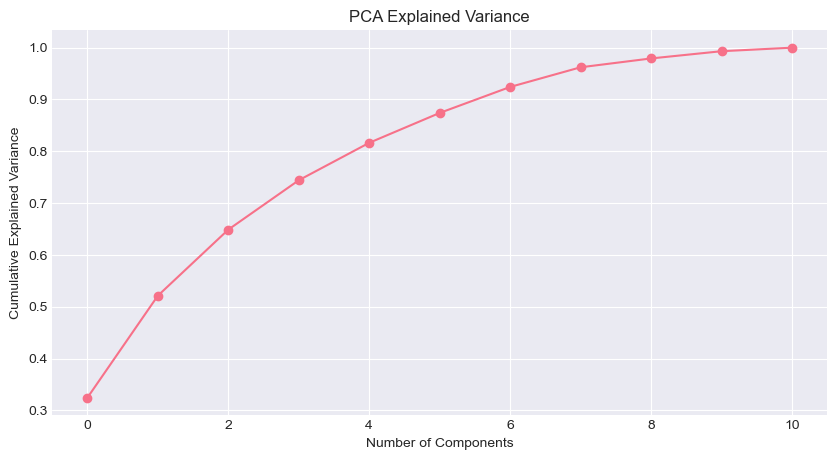

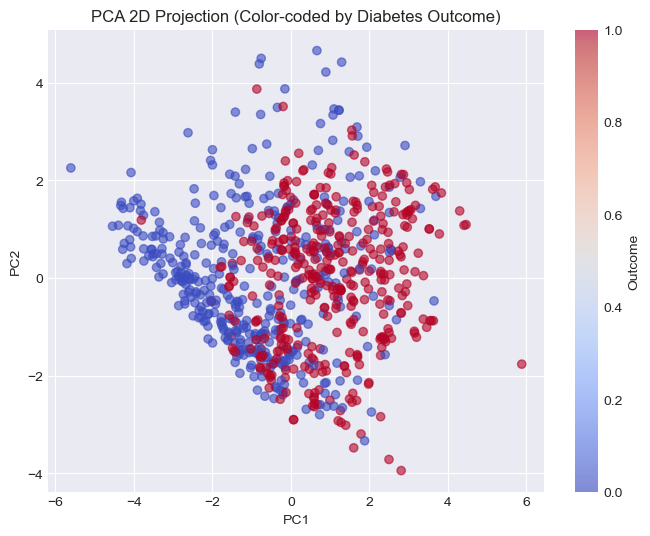

In [31]:
# ========== MODULE 4 - DIMENSIONALITY REDUCTION ==========
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_balanced)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# 2D visualization with outcome color-coding
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_balanced)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train_balanced, cmap='coolwarm', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Projection (Color-coded by Diabetes Outcome)')
plt.colorbar(label='Outcome')
plt.show()


 Final Model Performance:
Accuracy:  0.7667
Precision: 0.6290
Recall:    0.7647
F1-Score:  0.6903
ROC-AUC:   0.8219


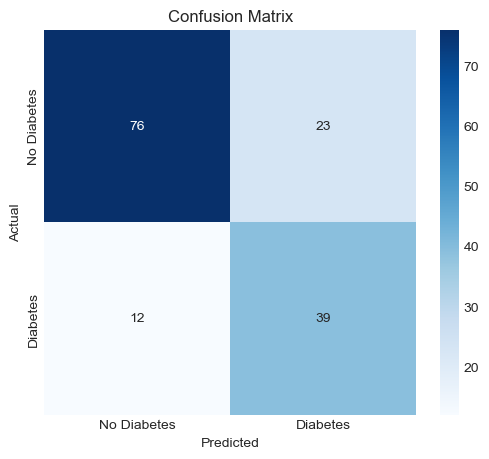

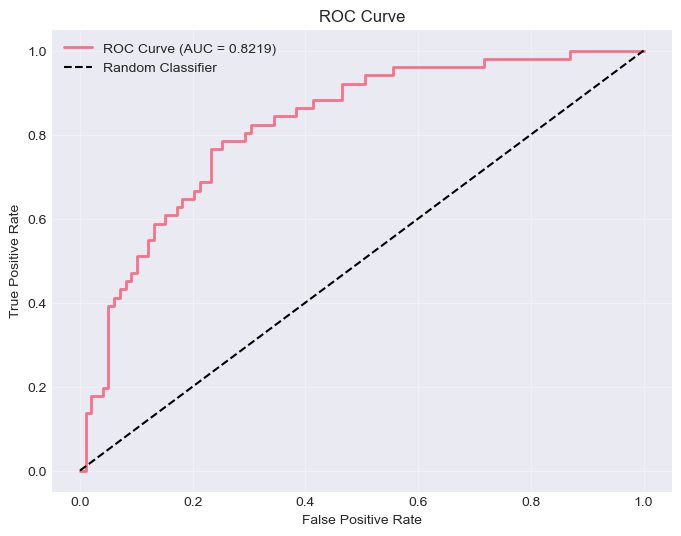


 Fairness Metrics (TPR by Age Group):
  <30: TPR = 0.556
  30-50: TPR = 0.929
  >50: TPR = 0.600


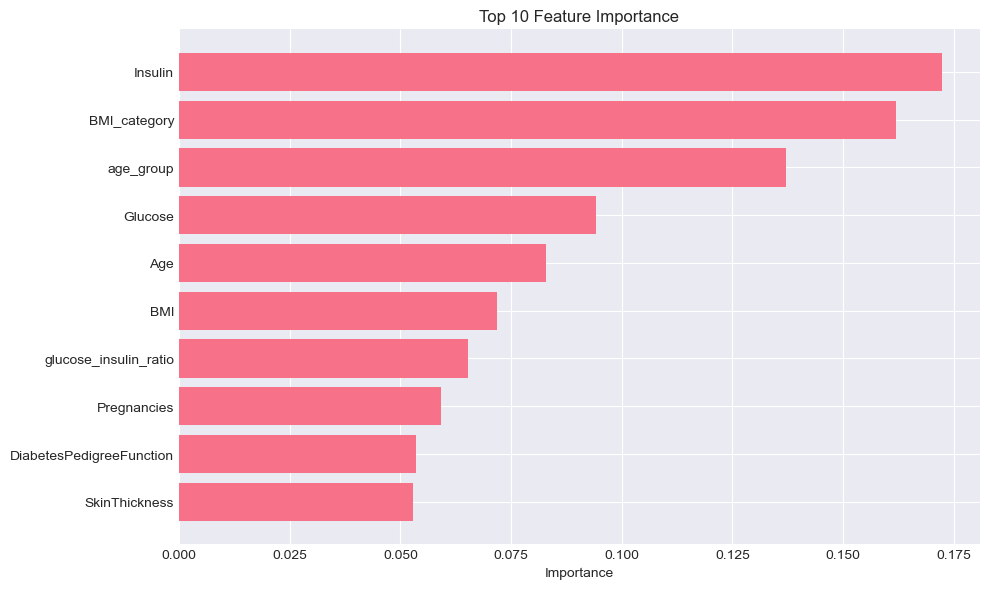

In [32]:
# ========== MODULE 5 - EVALUATION & FAIRNESS ==========

# Final Model Evaluation
y_pred_final = final_model.predict(X_test_scaled)
y_pred_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]

print("\n Final Model Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_final):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_final):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_final):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
auc_score = roc_auc_score(y_test, y_pred_proba_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Fairness Analysis across age groups
X_test_df = pd.DataFrame(X_test, columns=X.columns)
age_bins = [0, 30, 50, 100]
age_labels = ['<30', '30-50', '>50']
X_test_df['age_group_fair'] = pd.cut(X_test_df['Age'], bins=age_bins, labels=age_labels)

print("\n Fairness Metrics (TPR by Age Group):")
for age_group in age_labels:
    mask = (X_test_df['age_group_fair'] == age_group).values
    if mask.sum() > 0:
        y_true_group = y_test.iloc[mask] if hasattr(y_test, 'iloc') else y_test[mask]
        y_pred_group = y_pred_final[mask]
        tp = ((y_true_group == 1) & (y_pred_group == 1)).sum()
        fn = ((y_true_group == 1) & (y_pred_group == 0)).sum()
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        print(f"  {age_group}: TPR = {tpr:.3f}")

# Feature Importance
if hasattr(final_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()